In [1]:
# Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv(r"C:\Users\KUSHMA\Downloads\Assignemnent Questions\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\KUSHMA\Downloads\Assignemnent Questions\Titanic_test.csv")

In [2]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# Check for missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<Figure size 1000x800 with 0 Axes>

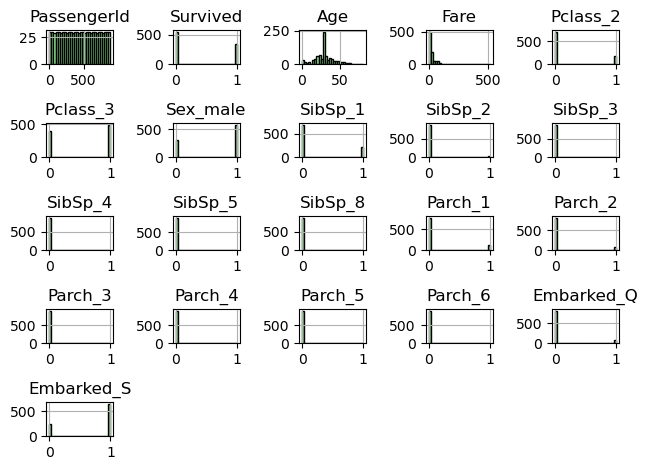

In [33]:
# Explore data distributions using histograms

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))

# Create histograms with specific color and edge color
train_df.hist(color='lightgreen', edgecolor='black', bins=30)  # You can adjust the number of bins as needed

# Show the plots
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


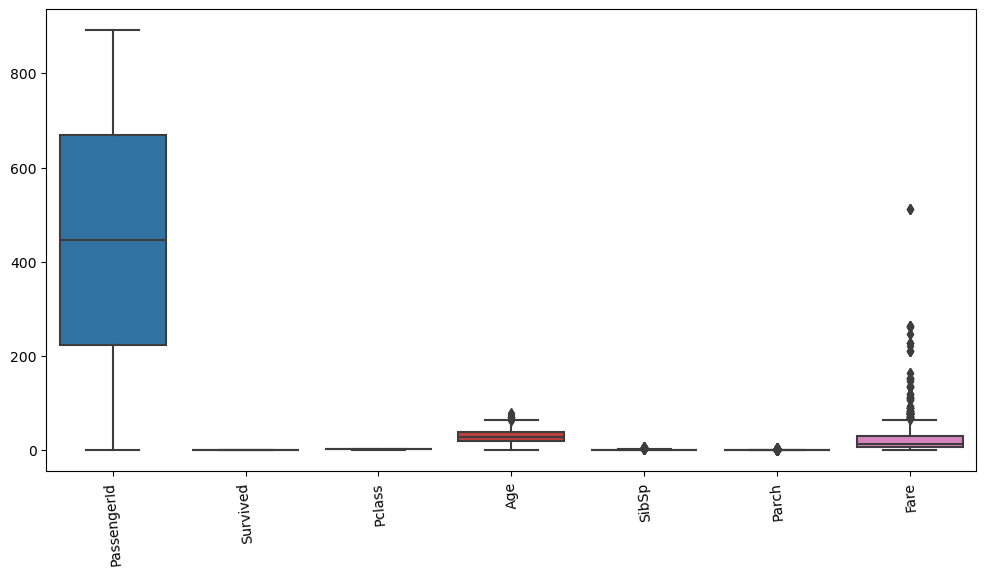

In [6]:
# Explore data distributions using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df.select_dtypes(include=[np.number]))
plt.xticks(rotation=95)
plt.show()

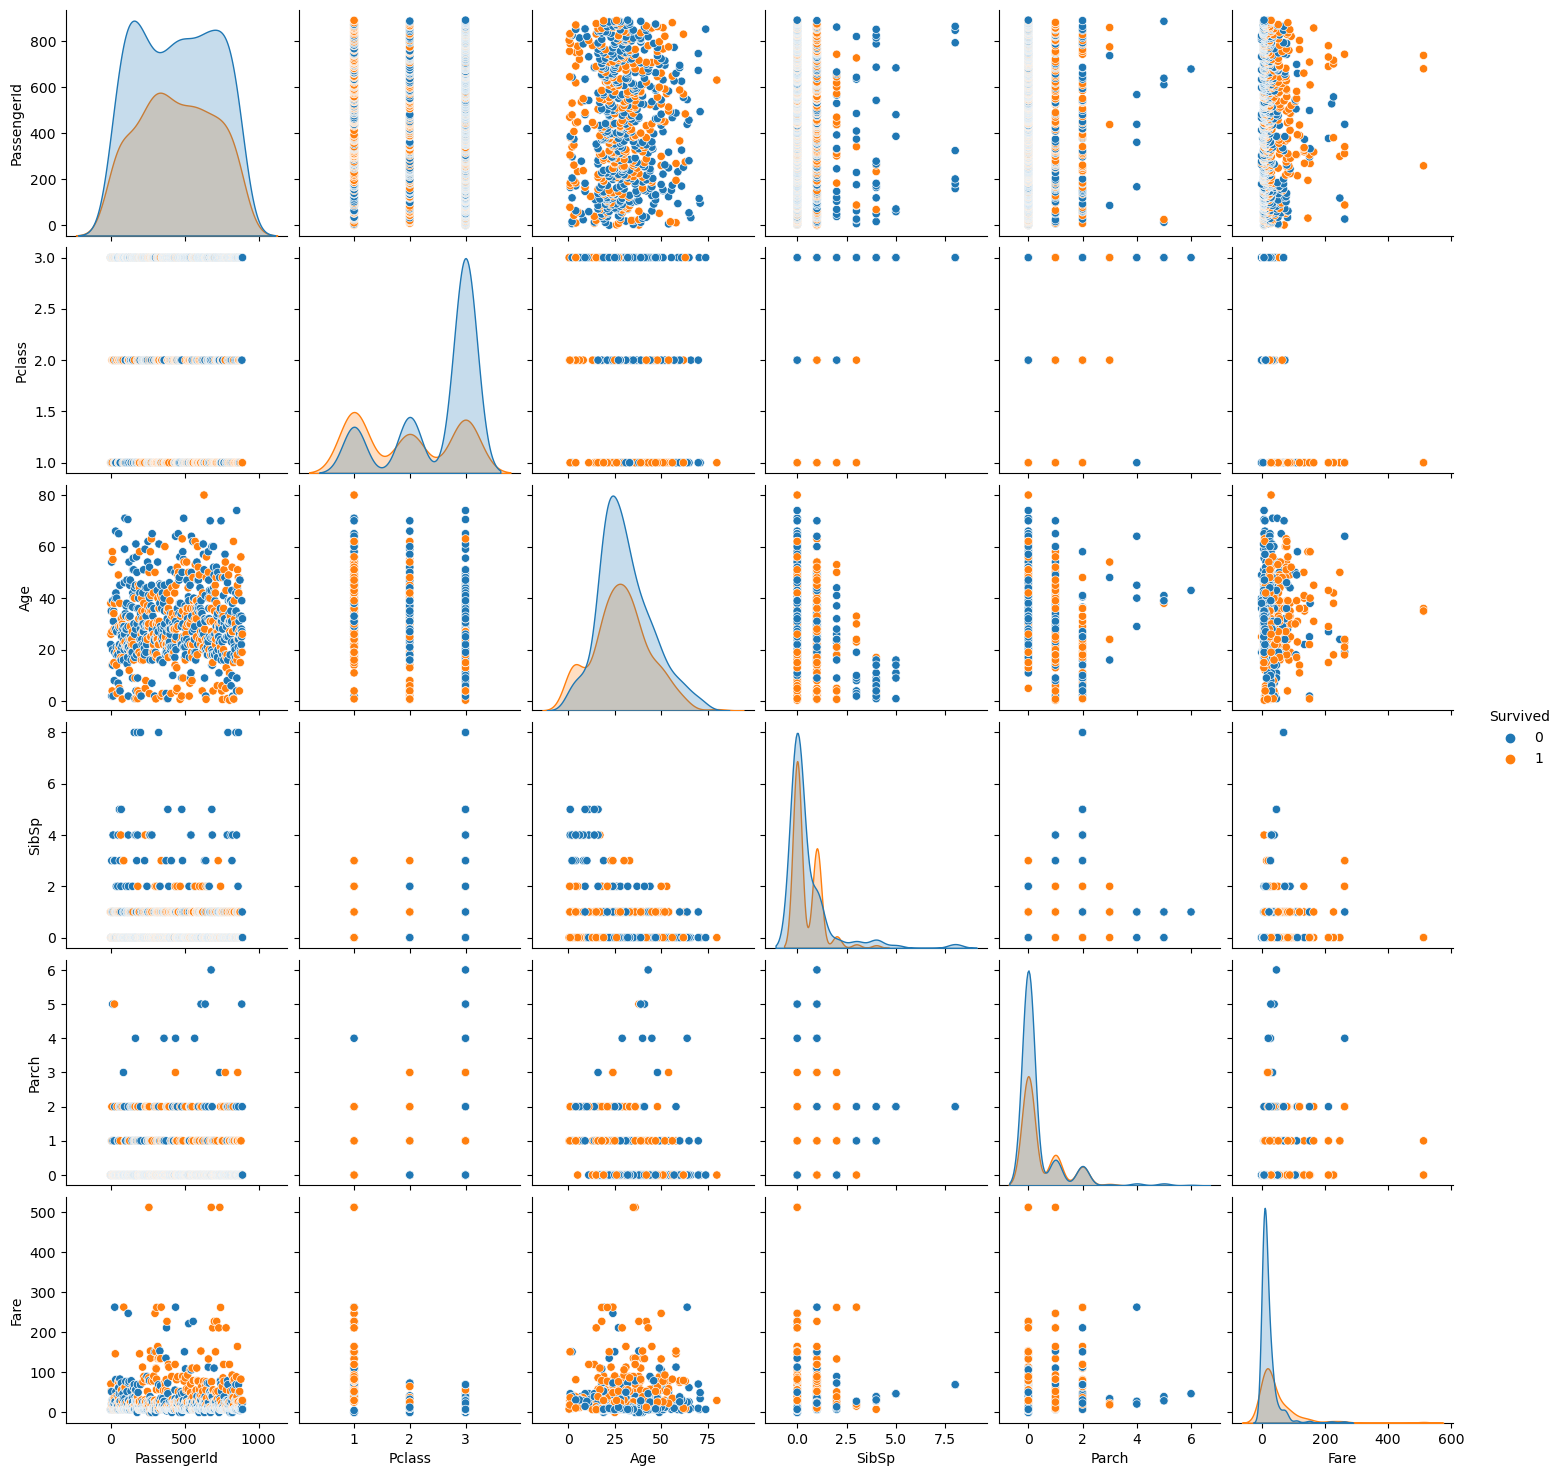

In [7]:
# Visualize relationships between features and survival
sns.pairplot(train_df, hue='Survived')
plt.show()

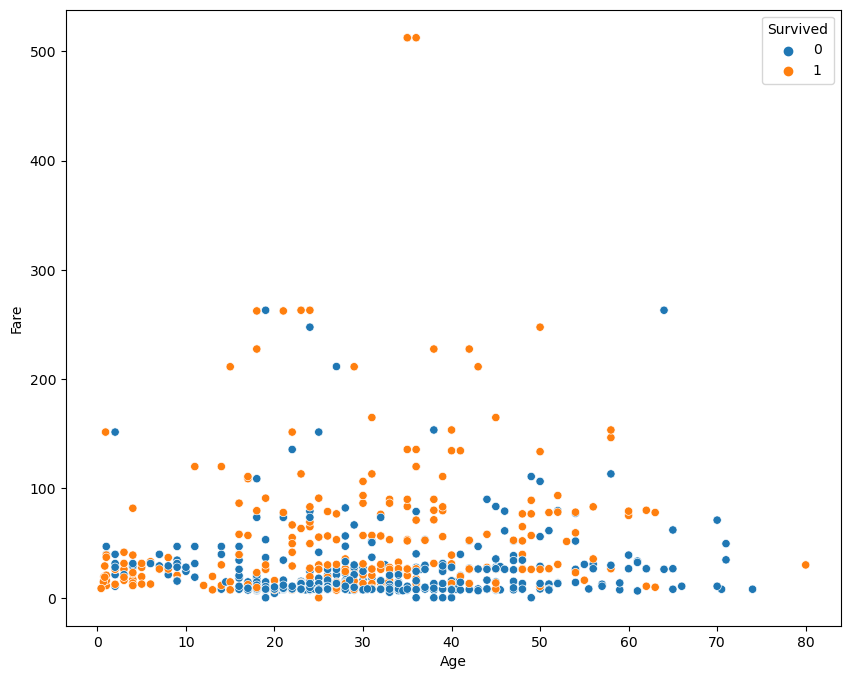

In [8]:
# Scatter plot for Age vs Fare colored by Survived
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived')
plt.show()

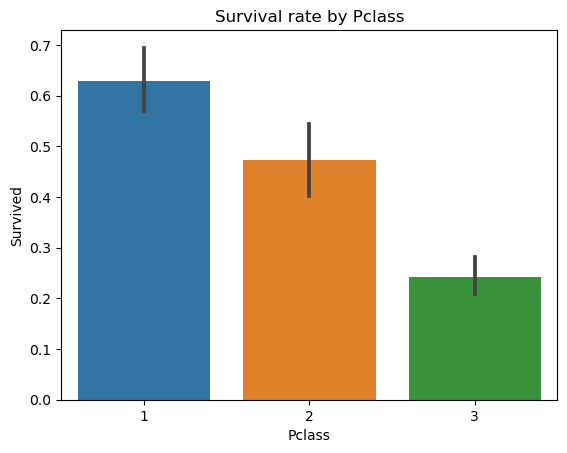

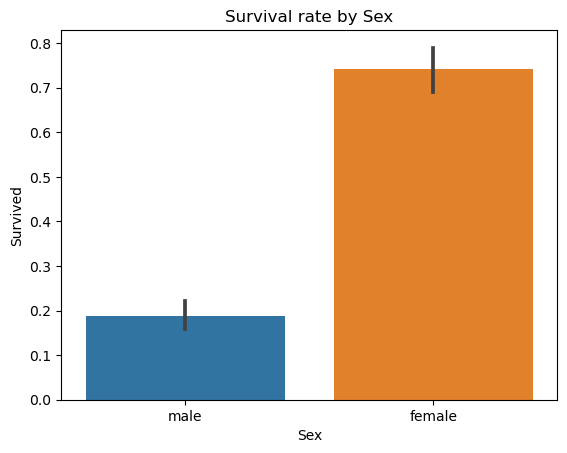

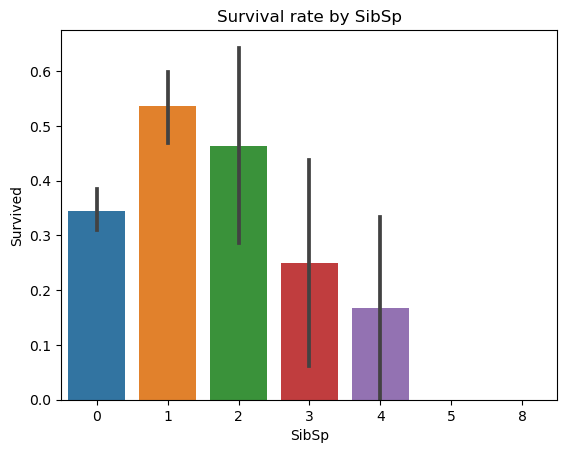

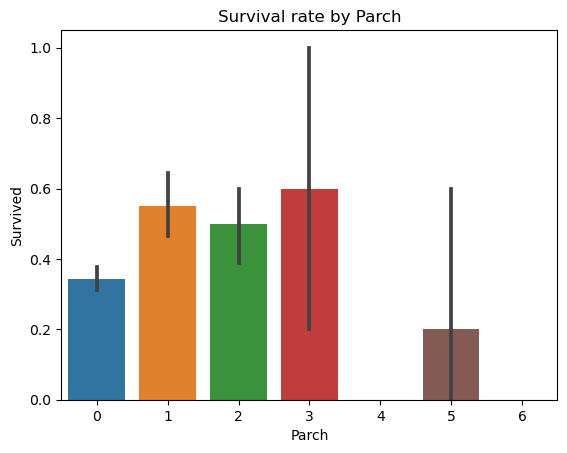

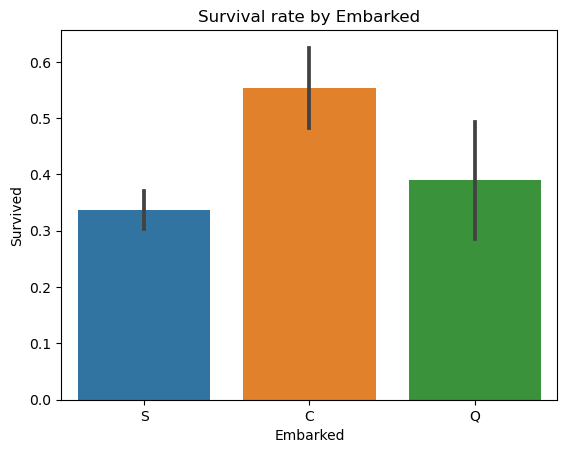

In [9]:
# Bar plot for categorical features
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for feature in categorical_features:
    sns.barplot(x=train_df[feature], y=train_df['Survived'])
    plt.title(f'Survival rate by {feature}')
    plt.show()

In [10]:
# Data Preprocessing

# Impute missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [11]:
# Encode categorical variables using one-hot encoding
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

In [12]:
train_df

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,...,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,211536,13.0000,NaN,1,0,1,...,0,0,0,0,0,0,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,112053,30.0000,B42,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,W./C. 6607,23.4500,NaN,0,1,0,...,0,0,0,1,0,0,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,111369,30.0000,C148,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test_df

,PassengerId,Name,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,SibSp_1,...,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,330911,7.8292,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,NaN,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,315154,8.6625,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,NaN,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",27.0,A.5. 3236,8.0500,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,PC 17758,108.9000,C105,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.5,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,"Ware, Mr. Frederick",27.0,359309,8.0500,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# Drop columns that won't be used
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [15]:
# Ensure both datasets have the same columns
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

In [16]:
X_train

,PassengerId,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,1,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,13.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,888,19.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,889,28.0,23.4500,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,890,26.0,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
X_test

,PassengerId,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S
0,892,34.5,7.8292,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,47.0,7.0000,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894,62.0,9.6875,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,27.0,8.6625,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896,22.0,12.2875,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,8.0500,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,39.0,108.9000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307,38.5,7.2500,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,27.0,8.0500,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [20]:
missing_cols

set()

In [21]:
# Building Predictive Models

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

In [22]:
# Split the preprocessed dataset into training and testing sets
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_split, X_valid, y_train_split, y_valid

(     PassengerId   Age      Fare  Pclass_2  Pclass_3  Sex_male  SibSp_1  \
 331          332  45.5   28.5000         0         0         1        0   
 733          734  23.0   13.0000         1         0         1        0   
 382          383  32.0    7.9250         0         1         1        0   
 704          705  26.0    7.8542         0         1         1        1   
 813          814   6.0   31.2750         0         1         0        0   
 ..           ...   ...       ...       ...       ...       ...      ...   
 106          107  21.0    7.6500         0         1         0        0   
 270          271  28.0   31.0000         0         0         1        0   
 860          861  41.0   14.1083         0         1         1        0   
 435          436  14.0  120.0000         0         0         0        1   
 102          103  21.0   77.2875         0         0         1        0   
 
      SibSp_2  SibSp_3  SibSp_4  SibSp_5  SibSp_8  Parch_1  Parch_2  Parch_3  \
 331  

In [23]:
# Evaluation metrics
def evaluate_model(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    cm = confusion_matrix(y_valid, y_pred)
    return accuracy, precision, recall, f1, cm

In [24]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_split, y_train_split)
lgb_metrics = evaluate_model(lgb_model, X_valid, y_valid)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 427
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [25]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_split, y_train_split)
xgb_metrics = evaluate_model(xgb_model, X_valid, y_valid)

In [26]:
print("LightGBM Metrics:", lgb_metrics)
print("XGBoost Metrics:", xgb_metrics)

LightGBM Metrics: (0.8212290502793296, 0.8088235294117647, 0.7432432432432432, 0.7746478873239436, array([[92, 13],
       [19, 55]], dtype=int64))
XGBoost Metrics: (0.7877094972067039, 0.7571428571428571, 0.7162162162162162, 0.7361111111111112, array([[88, 17],
       [21, 53]], dtype=int64))


In [27]:
# Comparative Analysis

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': lgb_metrics[:-1],
    'XGBoost': xgb_metrics[:-1]
})

print(metrics_df)

      Metric  LightGBM   XGBoost
0   Accuracy  0.821229  0.787709
1  Precision  0.808824  0.757143
2     Recall  0.743243  0.716216
3   F1 Score  0.774648  0.736111


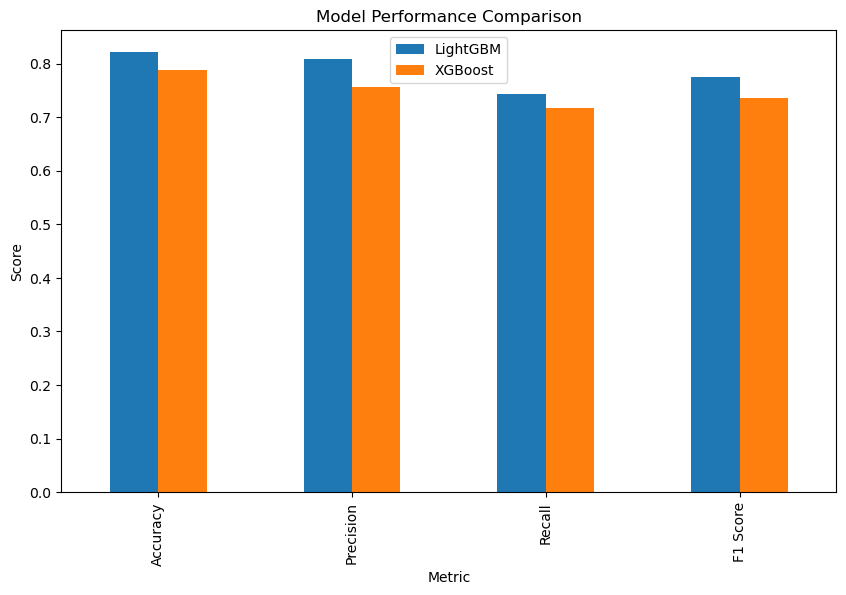

In [28]:
# Visualize the results
metrics_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

In [29]:
# Hyperparameter Tuning and Cross-Validation

# LightGBM Hyperparameter Tuning
lgb_params = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(), lgb_params, cv=5, scoring='accuracy')
lgb_grid.fit(X_train_split, y_train_split)
best_lgb_model = lgb_grid.best_estimator_
best_lgb_metrics = evaluate_model(best_lgb_model, X_valid, y_valid)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [30]:
# XGBoost Hyperparameter Tuning
xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train_split, y_train_split)
best_xgb_model = xgb_grid.best_estimator_
best_xgb_metrics = evaluate_model(best_xgb_model, X_valid, y_valid)

In [31]:
print("Best LightGBM Metrics:", best_lgb_metrics)
print("Best XGBoost Metrics:", best_xgb_metrics)

Best LightGBM Metrics: (0.8324022346368715, 0.8142857142857143, 0.7702702702702703, 0.7916666666666666, array([[92, 13],
       [17, 57]], dtype=int64))
Best XGBoost Metrics: (0.8100558659217877, 0.8125, 0.7027027027027027, 0.7536231884057971, array([[93, 12],
       [22, 52]], dtype=int64))
